<h1><center>Food Delivery. Customer Expenditure</center></h1>

FoodWheel is a fictional startup delivery service that takes away the struggle of deciding where to eat. FoodWheel picks you an amazing local restaurant and lets you order through the app.

### Focusing Questions

* What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
* How has the average order amount changed over time? What does this say about the trajectory of the company?
* How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

In [1]:
#importing libraries
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
#data ingestion
restaurants = pd.read_csv("restaurants.csv")

In [3]:
display(restaurants.head())
restaurants.shape

,id,name,neighborhood,cuisine
0,1,Jongro BBQ,Midtown,Korean
1,2,Pocha 32,Midtown,Korean
2,3,Nom Wah Tea Parlor,Chinatown,Chinese
3,4,Roberta’s,Brooklyn,Pizza
4,5,Speedy Romeo,Brooklyn,Pizza


(44, 4)

#### How many cuisine types are there in FoodWheel?

In [4]:
cuisine_options_count = restaurants.cuisine.nunique()
print("Total number of unique cuisines: ", cuisine_options_count)
cuisine_counts = restaurants.groupby('cuisine').name.count().reset_index()
cuisine_counts

Total number of unique cuisines:  7


,cuisine,name
0,American,10
1,Chinese,11
2,Italian,8
3,Japanese,4
4,Korean,3
5,Pizza,4
6,Vegetarian,4


#### What cuisines does FoodWheel offer?

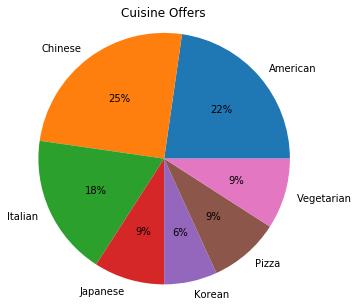

In [5]:
cuisines = cuisine_counts.cuisine.values
counts = cuisine_counts.name.values

fig, ax = plt.subplots(figsize=(5,5))
ax.pie(counts, labels=cuisines, autopct="%0d%%") #rounded to the nearest integer
ax.set_title("Cuisine Offers")
ax.axis('equal')
plt.show()

#### Orders Over Time

In [6]:
orders = pd.read_csv("orders.csv")

In [7]:
display(orders.head())
orders.shape

,id,customer_id,date,price
0,1,61,6-18-2017,13.0
1,2,210,5-8-2017,21.0
2,3,0,9-7-2017,33.0
3,4,66,7-7-2017,19.0
4,5,65,4-26-2017,13.0


(500, 4)

In [8]:
orders["month"] = orders.date.apply(lambda x: x.split('-')[0])
orders.head()

,id,customer_id,date,price,month
0,1,61,6-18-2017,13.0,6
1,2,210,5-8-2017,21.0,5
2,3,0,9-7-2017,33.0,9
3,4,66,7-7-2017,19.0,7
4,5,65,4-26-2017,13.0,4


Computing average order amount by month.

In [9]:
avg_order = orders.groupby('month').price.mean().reset_index()
avg_order

,month,price
0,4,9.609195
1,5,14.858824
2,6,15.152174
3,7,18.012821
4,8,21.150685
5,9,29.505882


Computing standard deviation of  order amount by month.

In [10]:
std_order = orders.groupby('month').price.std().reset_index()
std_order

,month,price
0,4,2.562504
1,5,3.395210
2,6,2.835934
3,7,2.848985
4,8,4.455556
5,9,4.518806


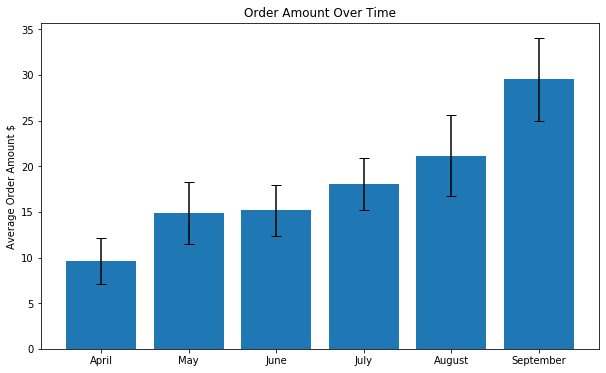

In [11]:
bar_heights = avg_order.price #price column
bar_error = std_order.price #price column


fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(len(avg_order)), bar_heights, yerr=bar_error, capsize=5)
ax.set_xticks(range(len(avg_order)))
ax.set_xticklabels(["April", "May", "June", "July", "August", "September"])
ax.set_ylabel("Average Order Amount $")
ax.set_title("Order Amount Over Time")
plt.show()

#### Customer Types

Grouping known costumers by how much they've spent over the last 6 months (total time of company's existance)

In [12]:
customer_amount = orders.groupby(['customer_id']).price.sum().reset_index()

In [13]:
customer_amount

,customer_id,price
0,0,83.0
1,2,11.0
2,3,65.0
3,4,32.0
4,5,119.0
...,...,...
219,245,68.0
220,246,16.0
221,247,35.0
222,248,89.0


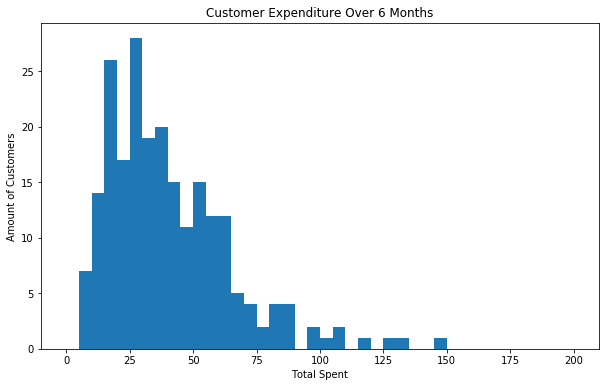

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax.hist(customer_amount.price, bins=40, range=(0,200))
ax.set_xlabel("Total Spent")
ax.set_ylabel("Amount of Customers")
ax.set_title("Customer Expenditure Over 6 Months")
plt.show()

#### Extra
We could also ask ourselves for the average amount that each unique customer is spending each month.
(We have 224 total unique customers)

In [22]:
orders.head()

,id,customer_id,date,price,month
0,1,61,6-18-2017,13.0,6
1,2,210,5-8-2017,21.0,5
2,3,0,9-7-2017,33.0,9
3,4,66,7-7-2017,19.0,7
4,5,65,4-26-2017,13.0,4


In [15]:
number_of_unique_clients = orders.customer_id.nunique()
print("Total number of unique clients: ", number_of_unique_clients)

Total number of unique clients:  224


In [23]:
customer_mean_expenditure_by_month = orders.groupby(['customer_id','month']).price.mean().reset_index()
customer_mean_expenditure_by_month.head()

,customer_id,month,price
0,0,5,12.666667
1,0,8,12.000000
2,0,9,33.000000
3,2,4,11.000000
4,3,4,10.000000


In [16]:
customer_mean_expenditure_by_month = orders.groupby(['customer_id','month']).price.mean().reset_index()
pivot = customer_mean_expenditure_by_month.pivot(columns='customer_id', index='month', values='price')
pivot 

customer_id,0,2,3,4,5,6,7,8,9,11,...,240,241,242,243,244,245,246,247,248,249
month,,,,,,,,,,,,,,,,,,,,,
4,NaN,11.0,10.0,NaN,NaN,13.0,11.0,NaN,NaN,11.0,...,NaN,NaN,8.0,NaN,NaN,8.0,8.0,NaN,NaN,NaN
5,12.666667,NaN,14.0,10.0,21.5,NaN,15.0,NaN,NaN,11.0,...,NaN,NaN,NaN,12.0,NaN,15.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,15.0,NaN,NaN,15.5,18.0,NaN,...,18.0,17.0,NaN,19.0,NaN,NaN,NaN,NaN,12.666667,18.0
7,NaN,NaN,19.0,NaN,16.0,16.0,NaN,NaN,NaN,NaN,...,16.5,18.0,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,9.0
8,12.000000,NaN,22.0,22.0,NaN,NaN,NaN,25.0,17.0,NaN,...,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,31.000000,NaN
9,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.0,NaN,...,31.0,NaN,NaN,29.0,30.0,32.0,NaN,35.0,NaN,NaN


Here we see that most costumers don't even buy from Foodwheel in a lot of months, and for the month they do, their average of for that month is depicted on the table. Look at costumer 248 for example and look at his order history:

In [17]:
orders[orders.customer_id==248].sort_values('month')

,id,customer_id,date,price,month
137,138,248,6-19-2017,15.0,6
189,190,248,6-12-2017,9.0,6
464,465,248,6-18-2017,14.0,6
226,227,248,7-5-2017,20.0,7
208,209,248,8-21-2017,31.0,8


In [18]:
(15+9+14)/3 #Average expenditure for costumer 248 on June

12.666666666666666